# Using Synth Data Classes

In [4]:
import randomize_data
import get_stats
import pandas as pd
import numpy as np
from scipy.stats import skewnorm

In [5]:
df = pd.read_csv('nimble_hourly_demandload_features_share.csv')
df.head()

,Avg_relative_humidity_set_1,Avg_wind_speed_set_1,Avg_air_temp_set_1,Avg_dew_point_temperature_set_1d,Avg_solar_radiation_set_1,RT_Demand,Dry_Bulb,Dew_Point,clearsky_ghi,clearsky_dni,...,"test_HDD_1day_(3, 4]","test_HDD_1day_(4, 5]","test_HDD_3day_(1, 2]","test_HDD_3day_(2, 3]","test_HDD_3day_(3, 4]","test_HDD_3day_(4, 5]","test_HDD_5day_(1, 2]","test_HDD_5day_(2, 3]","test_HDD_5day_(3, 4]","test_HDD_5day_(4, 5]"
0,57.45,4.01,21.98,13.11,399.023221,NaN,NaN,NaN,399,732,...,0,0,0,0,0,0,1,0,0,0
1,63.86,3.68,20.36,13.15,213.958869,NaN,NaN,NaN,213,589,...,0,0,0,0,0,0,1,0,0,0
2,66.04,2.67,19.77,13.19,24.000000,NaN,NaN,NaN,45,273,...,0,0,0,0,0,0,1,0,0,0
3,71.34,3.19,17.19,11.86,0.000000,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,1,0,0,0
4,79.92,1.53,15.24,11.70,0.000000,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# total hot weather days with weather features
hot_weather = df[df['test_CDD_1day'] == 0]
print(hot_weather.shape)

(1519, 81)


In [7]:
# hot weather days with demand load
df.dropna(inplace = True)
dl_hot_weather = df[df['test_CDD_1day'] == 0]
print(dl_hot_weather.shape)

(444, 81)


We lost nearly 1100 rows

In [8]:
extra_days = hot_weather.index[hot_weather.isnull().any(axis=1)]
extra_days

Int64Index([  7450,   7451,   7452,   7453,   7454,   7455,   7456,   7457,
              7458,   7459,
            ...
            155229, 155230, 155231, 155232, 155233, 155234, 155235, 155236,
            155237, 155238],
           dtype='int64', length=1075)

In [9]:
hot_weather_only = hot_weather[hot_weather.index.isin(extra_days)]
hot_weather_only.shape

(1075, 81)

In [10]:
stats_getter = get_stats.GetStats(dl_hot_weather.RT_Demand)
mean = stats_getter.get_mean()
std = stats_getter.get_std()

In [11]:
print(f"These stats should be stored as the same as if \n\
    we queried the RT demand col: \n\
    length: {stats_getter._len} min: {stats_getter._min} max: {stats_getter._max}\n\
    mean: {mean} and std: {std}")

These stats should be stored as the same as if 
    we queried the RT demand col: 
    length: 444 min: 559.314 max: 930.3530000000001
    mean: 731.088322072072 and std: 71.98528745027987


In [12]:
dl_hot_weather.RT_Demand.describe()

count    444.000000
mean     731.088322
std       72.066489
min      559.314000
25%      673.292250
50%      736.444500
75%      782.393250
max      930.353000
Name: RT_Demand, dtype: float64

The advantage of this class is that it will work with any list not just pandas dataframes

We can feed these stats into the `RandomData` class of the other lib

In [13]:
randomize = randomize_data.RandomData(hot_weather_only.shape[0], mean, std)

In [14]:
output = randomize.init_random_generator()

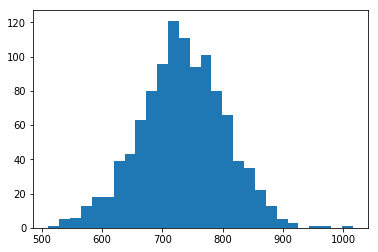

In [21]:
import matplotlib.pyplot as plt

plt.hist(output, bins='auto');

(array([ 9., 18., 34., 51., 40., 57., 69., 74., 38., 30., 15.,  6.,  3.]),
 array([559.314     , 587.85546154, 616.39692308, 644.93838462,
        673.47984615, 702.02130769, 730.56276923, 759.10423077,
        787.64569231, 816.18715385, 844.72861538, 873.27007692,
        901.81153846, 930.353     ]),
 <a list of 13 Patch objects>)

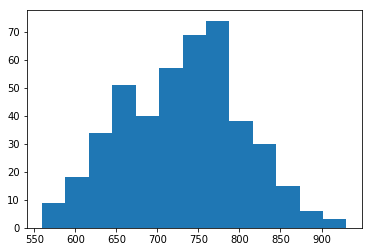

In [16]:
plt.hist(dl_hot_weather.RT_Demand, bins='auto')

You can see the spread is about the same but the distribution is slightly skewed on our real data.  We can attempt to model this

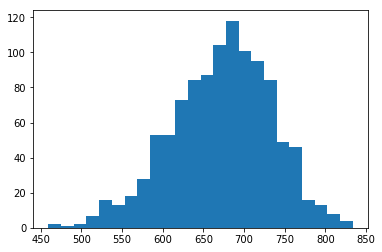

In [33]:
output_skewed = randomize.init_random_generator(spread = .20, skew = -1.75)
plt.hist(output_skewed, bins='auto');

More complicated stats functions will allow for more complex shapes and are still under development in the `randomize_data` library